In [ ]:
import numpy as np
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt

In [2]:
from numpy.random import seed

seed(1)

In [3]:
# Image params
img_rows, img_cols = 28, 28

# Data params
letter_file = "./emnist/emnist-letters-train.csv"
test_file = "./emnist/emnist-letters-test.csv"
num_classes=37
classes = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [4]:
## Prepare input data
def prep_data(raw):
    y = raw[:,0] # get the first column as label that we want to predict
    out_y = keras.utils.to_categorical(y,num_classes)
    
    x = raw[:,1:] # all other columns will be the set of features
    num_images = raw.shape[0]
    out_x = x.reshape(num_images,img_rows,img_cols,1) # reshape the numpy array so that it has colour channel
    out_x = out_x / 255 # normalise the value of the pixels in the numpy array
    
    return out_x,out_y

In [5]:
# Convert One-Hot_Encoded values back to real values
def decode_label(binary_encoded_label):
    return np.argmax(binary_encoded_label)-1

In [6]:
# plot an image with its correct value
def show_img(img,label):
    img_flip = np.transpose(img,axes=[1,0])
    plt.title('Label: ' + str(classes[decode_label(label)]))
    plt.imshow(img_flip,cmap='Greys_r')

In [7]:
# Evaluate model with the test data set
def eval_model(model,test_x,test_y):
    result = model.evaluate(test_x,test_y)
    print("The accuracy of the model is: ",result[1])
    return result

In [8]:
## Plot the training history
def plot_history(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc) + 1)
    
    # "bo" is for "blue dot"
    plt.plot(epochs,loss,'bo',label='Traning loss')
    plt.plot(epochs,acc,'b',label='Training accuracy')
    # b is for "solid blue line"
    
    plt.plot(epochs,val_loss,'ro',label='Validation Loss')
    plt.plot(epochs,val_acc,'r',label='Validation accuracy')
    
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    plt.legend()
    
    plt.show()
    

#### **Read train data**

We load the training data then prepare it

In [9]:
letter_file

'./emnist/emnist-letters-train.csv'

In [10]:
letter_data = np.loadtxt(letter_file,skiprows=1,delimiter=',')


In [11]:
x, y = prep_data(letter_data)

Then we check the size of the data, that can help in the future to decide how do we want to split it into train and test data.

In [12]:
print(x.shape)
print(y.shape)

(88799, 28, 28, 1)
(88799, 37)


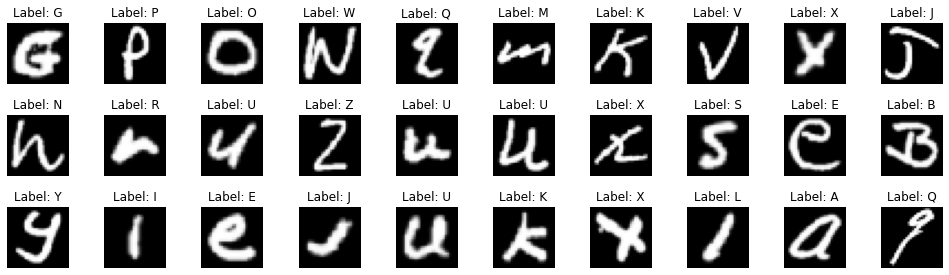

In [13]:
fig = plt.figure(figsize=(17,4.5))                                        
for i in range(30):
    fig.add_subplot(3,10,i+1)
    plt.axis('off')
    show_img(np.squeeze(x[i]),y[i])
plt.subplots_adjust(wspace=0.3,hspace=0.5)
    

#### Read Test Data

The final test data has to be loaded similarly

In [14]:
test_data = np.loadtxt(test_file,skiprows=1,delimiter=',')
test_x,test_y = prep_data(test_data)

In [15]:
print(test_x.shape)
print(test_y.shape)

(14799, 28, 28, 1)
(14799, 37)


### Building and Fitting The Models

##### Basic Solution

Firstly create a small network

In [16]:
def create_basic_model_with_reg():
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3,3), strides=1, activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(32,(3,3),activation='relu',strides=1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [17]:
batch_size = 128

basic_model_reg = create_basic_model_with_reg()
basic_history = basic_model_reg.fit(x,y,epochs=12)

2021-10-17 01:15:26.705897: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-17 01:15:27.225396: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12
2775/2775 [==============================] - 29s 10ms/step - loss: 0.5229 - accuracy: 0.8369
Epoch 2/12
2775/2775 [==============================] - 31s 11ms/step - loss: 0.2600 - accuracy: 0.9148
Epoch 3/12
2775/2775 [==============================] - 34s 12ms/step - loss: 0.2089 - accuracy: 0.9286
Epoch 4/12
2775/2775 [==============================] - 35s 13ms/step - loss: 0.1784 - accuracy: 0.9376
Epoch 5/12
2775/2775 [==============================] - 37s 13ms/step - loss: 0.1564 - accuracy: 0.9444
Epoch 6/12
2775/2775 [==============================] - 36s 13ms/step - loss: 0.1377 - accuracy: 0.9492
Epoch 7/12
2775/2775 [==============================] - 38s 14ms/step - loss: 0.1224 - accuracy: 0.9535
Epoch 8/12
2775/2775 [==============================] - 38s 14ms/step - loss: 0.1102 - accuracy: 0.9572
Epoch 9/12
2775/2775 [==============================] - 39s 14ms/step - loss: 0.1001 - accuracy: 0.9608
Epoch 10/12
2775/2775 [==============================] - 39s 14m

In [18]:
basic_history.history

{'loss': [0.5228800773620605,
  0.25998857617378235,
  0.2089468240737915,
  0.178412064909935,
  0.15637317299842834,
  0.13771241903305054,
  0.12238963693380356,
  0.11017975211143494,
  0.100082166492939,
  0.09172908216714859,
  0.0852704644203186,
  0.07883824408054352],
 'accuracy': [0.836878776550293,
  0.914762556552887,
  0.92861407995224,
  0.9376344084739685,
  0.9444250464439392,
  0.9491998553276062,
  0.9534904956817627,
  0.9572067260742188,
  0.9608441591262817,
  0.9629613161087036,
  0.9653374552726746,
  0.9676797986030579]}

In [22]:
basic_history.history

{'loss': [0.5228800773620605,
  0.25998857617378235,
  0.2089468240737915,
  0.178412064909935,
  0.15637317299842834,
  0.13771241903305054,
  0.12238963693380356,
  0.11017975211143494,
  0.100082166492939,
  0.09172908216714859,
  0.0852704644203186,
  0.07883824408054352],
 'accuracy': [0.836878776550293,
  0.914762556552887,
  0.92861407995224,
  0.9376344084739685,
  0.9444250464439392,
  0.9491998553276062,
  0.9534904956817627,
  0.9572067260742188,
  0.9608441591262817,
  0.9629613161087036,
  0.9653374552726746,
  0.9676797986030579]}

In [23]:
acc = basic_history.history['accuracy']

In [24]:
acc

[0.836878776550293,
 0.914762556552887,
 0.92861407995224,
 0.9376344084739685,
 0.9444250464439392,
 0.9491998553276062,
 0.9534904956817627,
 0.9572067260742188,
 0.9608441591262817,
 0.9629613161087036,
 0.9653374552726746,
 0.9676797986030579]

In [25]:
len(acc)

12

In [26]:
epochs = range(1,len(acc) + 1)

In [27]:
epochs

range(1, 13)

In [28]:
loss = basic_history.history['loss']

In [29]:
loss

[0.5228800773620605,
 0.25998857617378235,
 0.2089468240737915,
 0.178412064909935,
 0.15637317299842834,
 0.13771241903305054,
 0.12238963693380356,
 0.11017975211143494,
 0.100082166492939,
 0.09172908216714859,
 0.0852704644203186,
 0.07883824408054352]

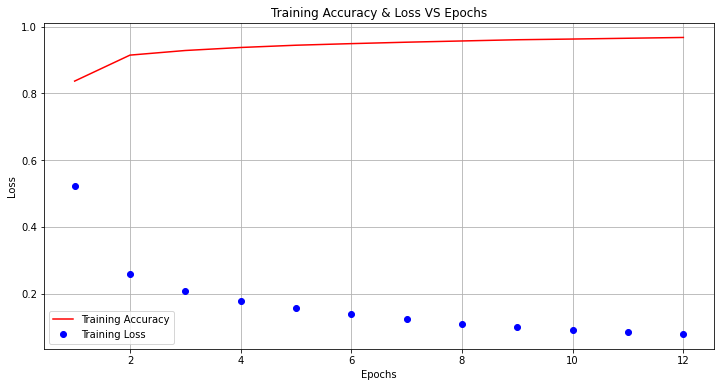

In [30]:
plt.figure(figsize=(12,6))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.title("Training Accuracy & Loss VS Epochs")
plt.xlabel('Epochs')
plt.grid(which='major')
plt.ylabel('Loss')
plt.legend()

In [31]:
basic_model_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                4

In [32]:
basic_model_reg.evaluate(test_x,test_y)

463/463 [==============================] - 1s 2ms/step - loss: 0.3022 - accuracy: 0.9193


[0.3021904528141022, 0.9193188548088074]